In [3]:
import scipy.integrate as it
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [2]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

           time   gravityX   gravityY   gravityZ      pich      roll       yaw
0      0.000000  -0.045126  -0.089848  -0.994933  0.089970 -0.045325  0.002041
1      0.010071  -0.044796  -0.090664  -0.994873  0.090789 -0.044997  0.002789
2      0.020142  -0.044705  -0.090697  -0.994875  0.090822 -0.044906  0.003636
3      0.030213  -0.044840  -0.090357  -0.994900  0.090480 -0.045040  0.004144
4      0.040285  -0.044898  -0.090139  -0.994917  0.090262 -0.045097  0.004336
...         ...        ...        ...        ...       ...       ...       ...
7929  79.854176  -0.043955  -0.112689  -0.992658  0.112928 -0.044251 -0.098373
7930  79.864248  -0.044575  -0.112256  -0.992679  0.112493 -0.044874 -0.097837
7931  79.874319  -0.044553  -0.113144  -0.992579  0.113387 -0.044856 -0.098101
7932  79.884390  -0.043669  -0.114773  -0.992431  0.115026 -0.043974 -0.098947
7933  79.894461  -0.043349  -0.115457  -0.992366  0.115715 -0.043655 -0.098775

[7934 rows x 7 columns]
[[ 0.00000000e+00  1.007100

/var/folders/sb/z1b6gf8j26j9nmn6vy1gzk140000gn/T/ipykernel_21983/334393105.py:50: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  window_size = np.abs(np.int(window_size))
/var/folders/sb/z1b6gf8j26j9nmn6vy1gzk140000gn/T/ipykernel_21983/334393105.py:51: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your

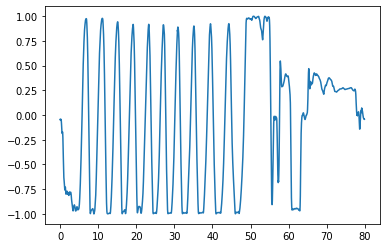

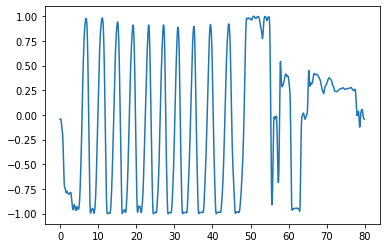

In [4]:
df = pd.read_csv('./data/raw/BarbellBicepCurl/[02_03]09-19-47/GravityAndAttitude.csv')
print(df)
time_vs_acc = df[["time", " gravityX", " gravityY", " gravityZ", " pich", " roll", " yaw"]].transpose().to_numpy()
print(time_vs_acc)
time = time_vs_acc[0]

accX = time_vs_acc[1]
accY = time_vs_acc[2]
accZ = time_vs_acc[3]
pitch = time_vs_acc[4]
roll = time_vs_acc[5]
yaw = time_vs_acc[6]

# SMOOTHING THE DATA
accXhat = savitzky_golay(accX, 51, 3)
accYhat = savitzky_golay(accY, 51, 3)
accZhat = savitzky_golay(accZ, 51, 3)
pitchhat = savitzky_golay(pitch, 51, 3)
rollhat = savitzky_golay(roll, 51, 3)
yawhat = savitzky_golay(yaw, 51, 3)

plt.plot(time, accX)
plt.show()

plt.plot(time, accXhat)
plt.show()

The graphs above clearly show some areas of randomness (where activity was recorded, but the set had not yet commenced) and some areas of repetitiveness (where the set is underway)

-> I need to extract the areas only where reps are being performed...

/var/folders/sb/z1b6gf8j26j9nmn6vy1gzk140000gn/T/ipykernel_21983/334393105.py:50: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  window_size = np.abs(np.int(window_size))
/var/folders/sb/z1b6gf8j26j9nmn6vy1gzk140000gn/T/ipykernel_21983/334393105.py:51: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your

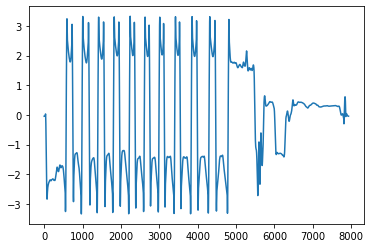

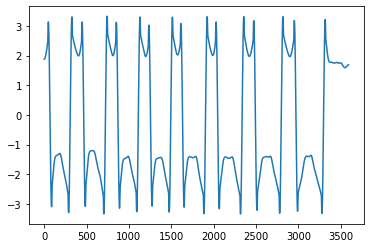

In [11]:
import pandas as pd
import numpy as np

def find_longest_section_below_threshold(data, threshold):
    longest_section_start = 0
    longest_section_length = 0
    current_section_start = 0
    current_section_length = 0
    
    for i, value in enumerate(data):
        if value <= threshold:
            current_section_length += 1
            if current_section_length > longest_section_length:
                longest_section_start = current_section_start
                longest_section_length = current_section_length
        else:
            current_section_start = i + 1
            current_section_length = 0
    
    return longest_section_start, longest_section_length

def extract_exercise_period(time_series, window_size, thresh_factor):

    longest_length = 0

    for i in range(1, 7):
        
        # Read the data and smooth using sg filter
        data = savitzky_golay(time_series[i], 51, 3)

        # Create a pandas DataFrame
        df = pd.DataFrame({'Value': data})

        # Calculate the rolling variance
        rolling_variance = df['Value'].rolling(window=window_size).var()
        # Find min value
        min_val = np.min(rolling_variance)
        # Specify the threshold value
        threshold = thresh_factor*min_val

        # Find the longest section below the threshold
        start, length = find_longest_section_below_threshold(rolling_variance, threshold)

        # Typically, one of the readings (yaw, pitch...) shows a long period of low variance, whilst the exercise is being performed
        # Extract this period to find the time where exercise was underway...
        if length > longest_length:
            longest_length = length
            longest_start = start

    return longest_start, longest_length


start, length = extract_exercise_period(time_vs_acc, 1000, 5)

test_data = rollhat

cutoff = 500

repetitive_segment = test_data[start+cutoff : start + length - cutoff]

plt.figure()
plt.plot(test_data)

plt.figure()
plt.plot(repetitive_segment)


Now, let's preprocess all the data. For each exercise:
    1. Iterate through all GravityAndAttitude Files
    2. Extract only the data where exercise is occurring
    3. Append these readings to a new txt file (with labels, and data)

In [121]:
import os
import json

# Specify the path to the parent folder
parent_folder = './data/raw'

JS_ID = 1

TXT_PATH_ACC = "./data/processed/accel.txt"
TXT_PATH_GYRO = "./data/processed/gyro.txt"
JSON_PATH_EX_DICT = "./data/processed/exdict.json"


i = 0

ex_dict = {}
ex_count = 0

# Iterate through all folders in the parent folder
for folder_name in os.listdir(parent_folder):
    exercise_name = folder_name
    if exercise_name not in ex_dict.keys():
        ex_dict[ex_count] = exercise_name
        ex_count += 1

    folder_path = os.path.join(parent_folder, folder_name)

    # Iterate through all files in the exercise directory and its subdirectories
    for root, _, files in os.walk(folder_path):
        for file_name in files:
            if file_name == "GravityAndAttitude.csv":
                file_path = os.path.join(root, file_name)
                df = pd.read_csv(file_path)
                data = df[["time", " gravityX", " gravityY", " gravityZ", " pich", " roll", " yaw"]].transpose().to_numpy()
                
                start, length = extract_exercise_period(data, 1000, 5)
                CUTOFF = 500

                # Extract only data where exercise is occurring
                extracted_data = data.T[start + cutoff : start + length - cutoff].T

                if length-2*cutoff > 0:
                    time_data = extracted_data[0]

                    shape = (length - 2*cutoff,)
                    ID_data = np.full(shape, JS_ID)
                    exercise_data = np.full(shape, ex_count-1)
                    

                    acc_data = extracted_data[1:4]
                    acc_rows = np.vstack((ID_data, exercise_data, time_data, acc_data)).T

                    gyro_data = extracted_data[4:7]
                    gyro_rows = np.vstack((ID_data, exercise_data, time_data, gyro_data)).T

                    if i == 0:
                        accel_array = acc_rows
                        gyro_array = gyro_rows
                    else:
                        accel_array = np.concatenate((accel_array, acc_rows), 0)
                        gyro_array = np.concatenate((gyro_array, gyro_rows), 0)

                    i += 1
                
# Use numpy.savetxt() to write the array to the CSV file
np.savetxt(TXT_PATH_ACC, accel_array, delimiter=',', fmt='%.10f')
np.savetxt(TXT_PATH_GYRO, gyro_array, delimiter=',', fmt='%.10f')

with open(JSON_PATH_EX_DICT, 'w') as json_file:
    json.dump(ex_dict, json_file)

/var/folders/sb/z1b6gf8j26j9nmn6vy1gzk140000gn/T/ipykernel_21983/334393105.py:50: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  window_size = np.abs(np.int(window_size))
/var/folders/sb/z1b6gf8j26j9nmn6vy1gzk140000gn/T/ipykernel_21983/334393105.py:51: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your